In [1]:
import numpy as np
import pandas as pm 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [4]:
raw_data = pm.read_csv('Admitted.csv')
raw_data


,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [6]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


Variables

In [7]:
y = data['Admitted']
x1 = data['SAT']

Scatter Plot

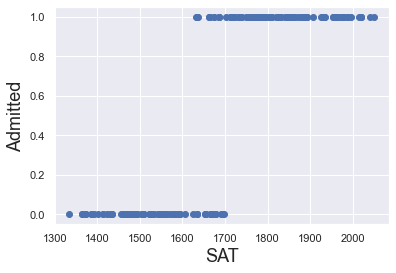

In [8]:
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=18)
plt.ylabel('Admitted',fontsize=18)
plt.show()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


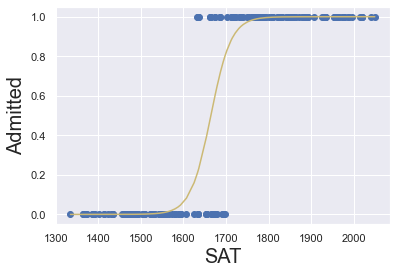

In [15]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()
